# Iterative Solvers

## Daniel Dimitrov

In [89]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

from scipy import sparse

In [2]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
        A = np.zeros((n,n))
        rows = np.random.choice(np.arange(0,n), size=num_entries)
        cols = np.random.choice(np.arange(0,n), size=num_entries)
        data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

### Problems 1 & 2

In [83]:
def jacobi(A,b, maxiters, plot = False):
    
    errs = np.empty(maxiters)
    err = 100
    tol = 1e-9
    counter = 0
    D = np.diag(A)
    x_new, x = np.zeros(len(A)),np.zeros(len(A)) #initial guess
    
    while (err > tol) and (counter+1 < maxiters ):
        x_new = x + (b - A @ x) / D
        err = la.norm(x-x_new, np.inf)
        errs[counter] = err
        x = x_new.copy() 
        counter +=1
    if plot:
        #print(errs[:counter],counter)        
        plt.semilogy(range(1,counter), errs[1:counter])
    return x



True

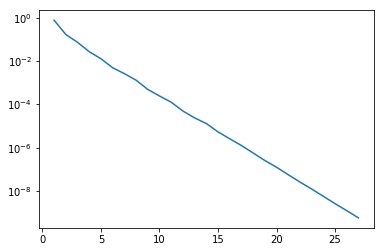

In [84]:
n = 100
A = diag_dom(n)
b = np.random.random(n)*10
x = jacobi(A,b,250,True)

np.allclose(A@x,b,atol=1e-6)

## Problem 3

In [97]:
def gausSeidel(A,b, maxiters, plot = False):
    
    errs = np.empty(maxiters)
    err = 100
    tol = 1e-9
    counter = 0
    x_new, x = np.zeros(len(A)),np.zeros(len(A))
    
    while (err > tol) and (counter+1 < maxiters ):
        for i in range(len(x)):
            x_new[i] = x_new[i] + (1 / A[i, i]) * (b[i] - A[i, :].T @ x_new)  
        err = la.norm(x-x_new, np.inf)
        errs[counter] = err
        x = x_new.copy() 
        counter +=1
    if plot:
        #print(errs[:counter],counter)        
        plt.semilogy(range(1,counter), errs[1:counter])
    return x



100


True

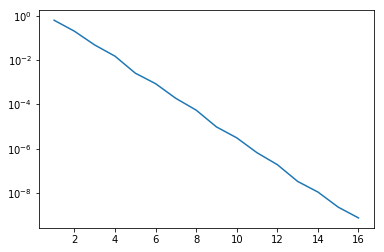

In [98]:
n = 100
A = diag_dom(n)
b = np.random.random(n)*10
x = gausSeidel(A,b,250,True)
print(len(A))
np.allclose(A@x,b,atol=1e-6)

## Problem 4

In [117]:
def gausSeidelSparse(A,b, maxiters, plot = False):
    
    errs = np.empty(maxiters)
    err = 100
    tol = 1e-9
    counter = 0
    n = np.shape(A)[0]
    x_new, x = np.zeros(n),np.zeros(n)
    
    while (err > tol) and (counter+1 < maxiters ):
        for i in range(len(x)):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]

            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x_new[i] = x_new[i] + (1 / A[i, i]) * (b[i] - Aix)             
        err = la.norm(x-x_new, np.inf)
        errs[counter] = err
        x = x_new.copy() 
        counter +=1
    if plot:
        plt.semilogy(range(1,counter), errs[1:counter])
    return x



True

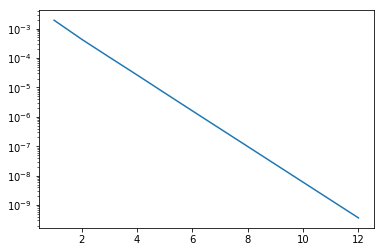

In [119]:
A = sparse.csr_matrix(diag_dom(10000))
b = np.random.random(10000)

x = gausSeidelSparse(A,b,250,True)
np.allclose(A@x,b,atol=1e-6)

## Problem 5

In [154]:
def SOR(A,b,omega, maxiters, plot = False):
    # relaxing factor omega > = 1
    errs = np.empty(maxiters)
    err = 100
    tol = 1e-9
    counter = 0
    n = np.shape(A)[0]
    x_new, x = np.zeros(n),np.zeros(n)
    
    while (err > tol) and (counter+1 < maxiters ):
        for i in range(len(x)):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]

            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x_new[i] = x_new[i] + (omega / A[i, i]) * (b[i] - Aix)             
        err = la.norm(x-x_new, np.inf)
        errs[counter] = err
        x = x_new.copy() 
        counter +=1
    if plot:
        plt.semilogy(range(1,counter), errs[1:counter])
    return x

True

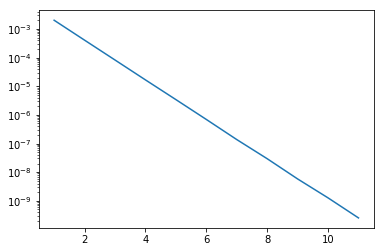

In [161]:
A = sparse.csr_matrix(diag_dom(10000))
b = np.random.random(10000)
omega = 1.05

x = SOR(A,b,omega,50,True)
np.allclose(A@x,b,atol=1e-6)

## Problem 6

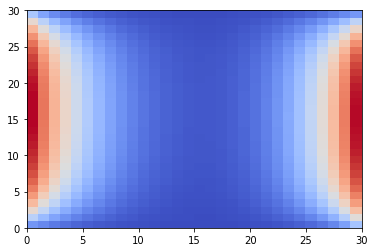

In [167]:
n = 30
A = -4 * np.eye(n**2) + np.eye(n**2, k=1) + np.eye(n**2, k=-1) + np.eye(n**2, k=-n) + np.eye(n**2, k=n)
b = np.zeros(n)
b[0] = -100
b[-1] = -100
b = np.tile(b, n)
omega = 1.1
u = gausSeidel(A,b, 50, False)
u = u.reshape(n, n)

plt.figure()
plt.pcolormesh(u, cmap='coolwarm')